# Statistics

- Normality test
- Portfolio theory
- Principal component analysis
- Bayesian regression

## Normality Tests
The normal distribution is the most important distribution in finance. The following models largely rely on the normal distribution of stock market returns.
- Modern portfolio theory
- Capital asset pricing model
- Efficient market hypothesis
- Option pricing theory

### Benchmark Case

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, vol, T, M, I):
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        rn = np.random.standard_normal(I)
        rn = (rn - rn.mean()) / rn.std()
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn)
    return S

In [3]:
S0 = 100.
r = 0.05
vol = 0.2
T = 1.
M = 50
I = 250000

In [4]:
paths = gen_paths(S0, r, vol, T, M, I)

Text(0, 0.5, 'index level')

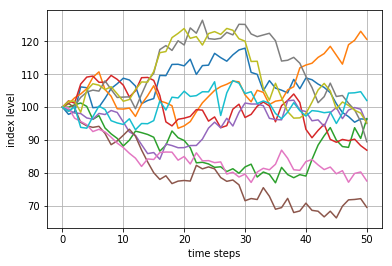

In [5]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [6]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [7]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [8]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [27]:
def print_stats(array):
    stats = scs.describe(array)
    print("{:14s} {:15s}".format('statistic', 'value'))
    print(30 * "-")
    print("{:14s} {:15.5f}".format('size', stats[0]))
    print("{:14s} {:15.5f}".format('min', stats[1][0]))
    print("{:14s} {:15.5f}".format('max', stats[1][1]))
    print("{:14s} {:15.5f}".format('mean', stats[2]))
    print("{:14s} {:15.5f}".format('std', np.sqrt(stats[3])))
    print("{:14s} {:15.5f}".format('skew', stats[4]))
    print("{:14s} {:15.5f}".format('kurtosis', stats[5]))

In [28]:
print_stats(log_returns.flatten())

statistic      value          
------------------------------
size            12500000.00000
min                   -0.15664
max                    0.15371
mean                   0.00060
std                    0.02828
skew                   0.00055
kurtosis               0.00085
